# Transformations

One important piece of the visualization pipeline is **data transformation**.

With Altair, you have two possible routes for data transformation; namely:

1. pre-transformation in Python
2. transformation in Altair/Vega-Lite

In [1]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

RendererRegistry.enable('notebook')

## Calculate Transform

As an example, let's take a look at transforming some input data that is not encoded in the most intuitive manner.
The ``population`` dataset lists aggregated US census data by year, sex, and age, but lists the sex as "1" and "2", which makes charts labels not particularly intuitive:

In [2]:
from vega_datasets import data
population = data.population()

In [3]:
population.head()

,age,people,sex,year
0,0,1483789,1,1850
1,0,1450376,2,1850
2,5,1411067,1,1850
3,5,1359668,2,1850
4,10,1260099,1,1850


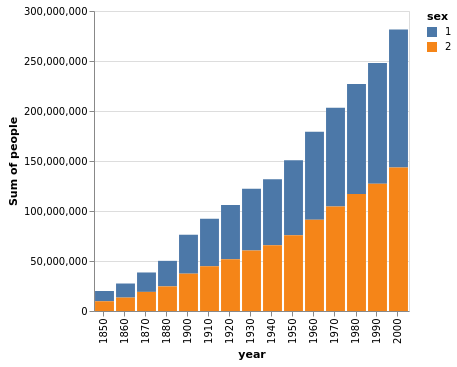

In [4]:
alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color='sex:N'
)

One way we could address this from Python is to use tools in Pandas to re-map these column names; for example:

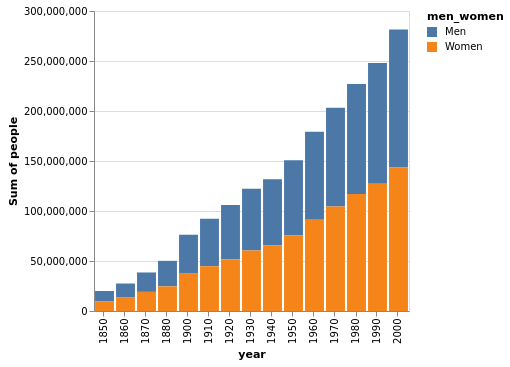

In [5]:
population['men_women'] = population['sex'].map({1: 'Men', 2: 'Women'})

alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color='men_women:N'
)

But Altair is designed to be used with URL-based data as well, in which such pre-processing is not available.
In these situations, it is better to make the transformation *part of the plot specification*.
Here this can be done via the ``transform_calculate`` method, which accepts a [Vega Expression](), which is essentially a string that can contain a small subset of javascript operations:

In [6]:
# undo our addition of a column above...
population = population.drop('men_women', axis=1)

In [ ]:
alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color='men_women:N'
).transform_calculate(
    men_women='datum.sex == 1 ? "Men" : "Women"'
)

The one potentially confusing piece is the presence of the word "datum": this is simply the convention by which Vega expressions refer to a row of the data.

If you would prefer to build these expressions in Python, Altair provides a lightweight API to do so:

In [ ]:
from altair.expr import datum, if_

alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
    color='men_women:N'
).transform_calculate(
    men_women=if_(datum.sex == 1, "Men", "Women")
)

## Filter Transform

The filter transform is similar. For example, suppose you would like to create a chart consisting only of the male population from these census records.
As above, this could be done from Pandas, but it is useful to have this operation available within the chart specification as well.
It can be done via the ``transform_filter()`` method:

In [ ]:
alt.Chart(population).mark_bar().encode(
    x='year:O',
    y='sum(people):Q',
).transform_filter(
    "datum.sex == 1"
)

We have seen this ``transform_filter`` method before, when we filtered based on the result of a selection.

## Other Transforms

Other transform methods are available, and though we won't demonstrate them here, there are examples available in the Altair [Transform documentation]().

Altair provides a number of other transforms. Some will be quite familiar:

- ``transform_aggregate()``
- ``transform_bin()``
- ``transform_timeUnit()``

These three transforms accomplish exactly the types of operations we discussed in [03-Binning-and-aggregation](03-Binning-and-aggregation.ipynb), with the distinction that they result in the creation of a new named value that can be referenced in multiple places throughout the chart.

Two other transforms exist as well:

- ``transform_lookup()``: this lets you perform one-sided joins of multiple datasets. It is used often, for example, in geographic visualizations where you join data (such as unemployment within states) to data about geographic regions used to represent that data
- ``transform_window()``: this lets you perform aggregates across sliding windows, for example computing local means of data. It was recently added to Vega-Lite, and so the Altair API for this transform is not yet very convenient.

## Exercise

Take the following data:

In [ ]:
import pandas as pd
import numpy as np
x = pd.DataFrame({'x': np.linspace(-5, 5)})

1. Create a chart based on this data, and plot sine and cosine curves using Altair's ``transform_calculate`` API. 
2. Use ``transform_filter`` on this chart, and remove the regions of the plot where the value of the cosine curve is less than the value of the sine curve.